In [6]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Assuming 'uber_data' is the DataFrame containing Uber ride data
# Load the data into a DataFrame (replace '/content/UberDataset.csv' with your data file)
uber_data = pd.read_csv('/content/UberDataset.csv')

In [8]:
# Displaying basic information about the DataFrame
print(uber_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB
None


In [9]:
# Displaying summary statistics for numerical columns
print(uber_data.describe())

              MILES
count   1156.000000
mean      21.115398
std      359.299007
min        0.500000
25%        2.900000
50%        6.000000
75%       10.400000
max    12204.700000


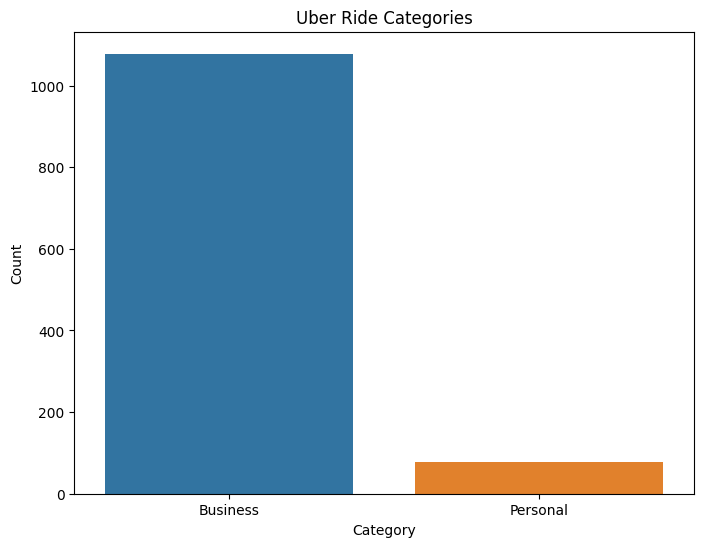

In [10]:
# Visualizing ride categories using a countplot
plt.figure(figsize=(8, 6))
sns.countplot(x='CATEGORY', data=uber_data)
plt.title('Uber Ride Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

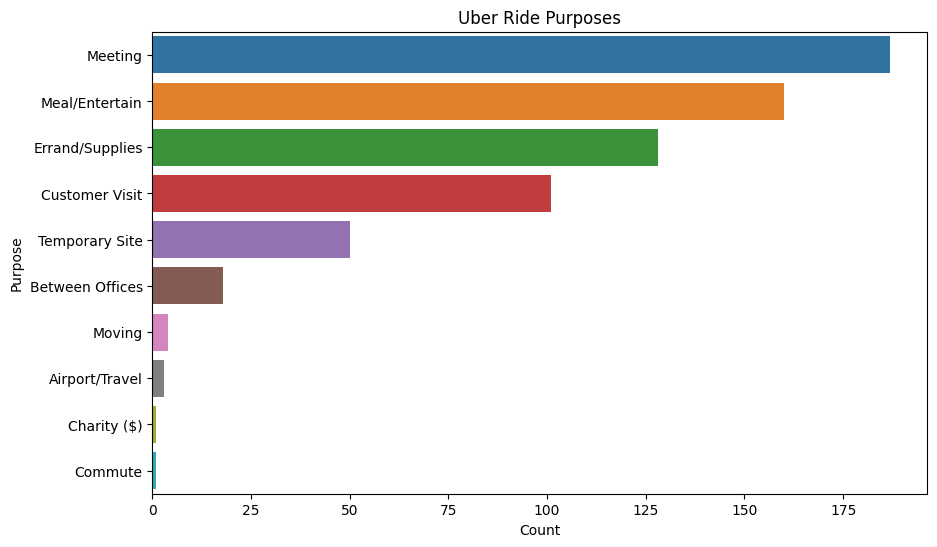

In [11]:
# Analyzing ride purposes with a bar plot
plt.figure(figsize=(10, 6))
sns.countplot(y='PURPOSE', data=uber_data, order=uber_data['PURPOSE'].value_counts().index)
plt.title('Uber Ride Purposes')
plt.xlabel('Count')
plt.ylabel('Purpose')
plt.show()

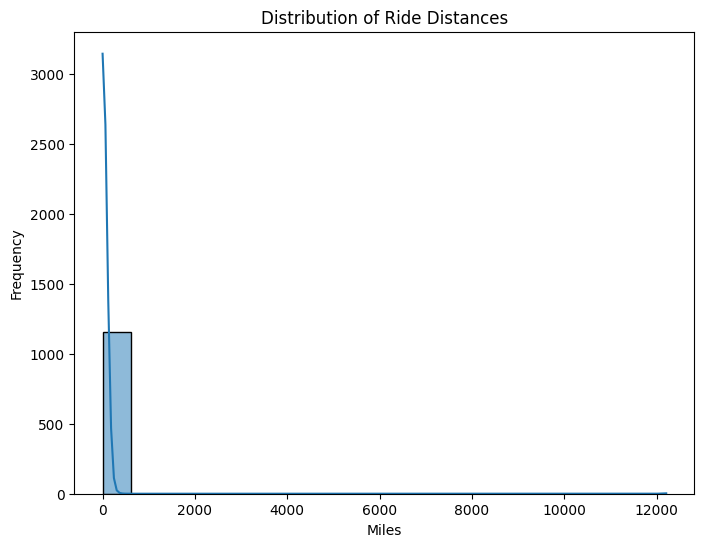

In [12]:
# Plotting a histogram of ride distances in miles
plt.figure(figsize=(8, 6))
sns.histplot(uber_data['MILES'], bins=20, kde=True)
plt.title('Distribution of Ride Distances')
plt.xlabel('Miles')
plt.ylabel('Frequency')
plt.show()

In [14]:
# Assuming 'uber_data' is your DataFrame
# Convert 'START_DATE' and 'END_DATE' columns to datetime format
uber_data['START_DATE'] = pd.to_datetime(uber_data['START_DATE'], errors='coerce')
uber_data['END_DATE'] = pd.to_datetime(uber_data['END_DATE'], errors='coerce')

In [15]:
# Filter out rows with invalid dates (e.g., 'Totals')
uber_data = uber_data.dropna(subset=['START_DATE', 'END_DATE'])
uber_data['RIDE_DURATION'] = (uber_data['END_DATE'] - uber_data['START_DATE']).dt.total_seconds() / 60  # in minutes


<ipython-input-15-39de999b2daa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uber_data['RIDE_DURATION'] = (uber_data['END_DATE'] - uber_data['START_DATE']).dt.total_seconds() / 60  # in minutes


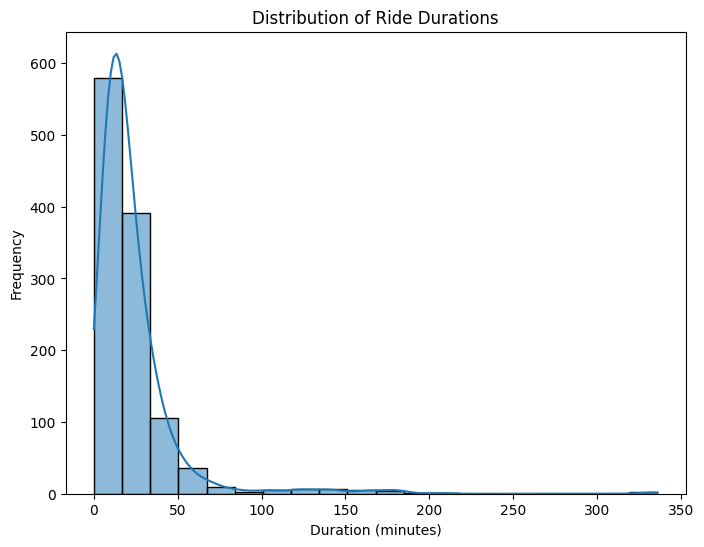

In [16]:
# Plotting a histogram of ride durations
plt.figure(figsize=(8, 6))
sns.histplot(uber_data['RIDE_DURATION'], bins=20, kde=True)
plt.title('Distribution of Ride Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()